# Домашнее задание по теме «Деревья решений»

***Цель:***  
Построить модель регрессии, дерево решений, оптимизировать параметры и сравнить результаты.

***Описание задания:***
Для выполнения домашнего задания необходимо взять файл boston house-prices datase (sklearn.datasets.load_boston) и построить модель.
По аналогии задания к лекции «Классификация: Логистическая регрессия и SVM»
А именно построить модель регрессии, дерево решений, оптимизировать параметры и сравнить результаты.

***План:***
1. Загрузка и изучение датасета
2. Построение моделей и сравнение результатов
3. Выводы по работе

### Шаг 1. Загрузка и изучение данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer

In [3]:
houses = pd.read_csv(load_boston()['filename'], skiprows=1)
houses

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


Данные нам знакомы из прошлого домашнего задания. Пропусков там нет, но есть большие выбросы в столбцах "CRIM" и "ZN". Посмотрим снова на них:

In [5]:
houses.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Boxplot CRIM


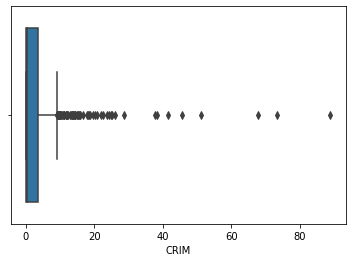

Distplot CRIM


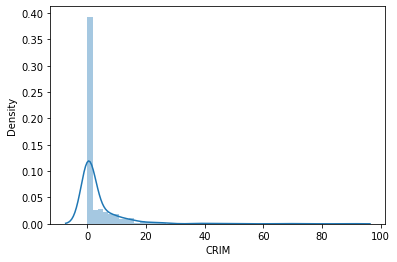

In [6]:
print('\x1b[1;0346m'+'Boxplot {}'.format('CRIM') +'\x1b[0m')
sns.boxplot(x=houses['CRIM'])
plt.show()
print('\x1b[1;0346m'+'Distplot {}'.format('CRIM')+'\x1b[0m')
sns.distplot(houses['CRIM'])
plt.show()

Boxplot ZN


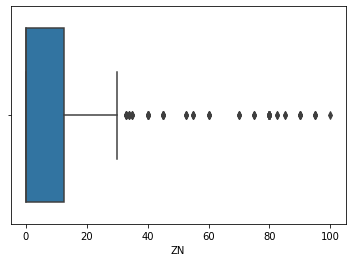

Distplot ZN


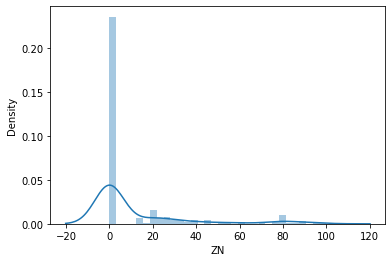

In [7]:
print('\x1b[1;0346m'+'Boxplot {}'.format('ZN') +'\x1b[0m')
sns.boxplot(x=houses['ZN'])
plt.show()
print('\x1b[1;0346m'+'Distplot {}'.format('ZN')+'\x1b[0m')
sns.distplot(houses['ZN'])
plt.show()

Вот они - наши выбросы. В остальных колонках всё не так печально, как здесь. Оставим данные такими, как они есть, и обучим модели линейной регрессии и дерево решений.

Подготовим датафрейм для обучения:

In [8]:
features = houses.drop('MEDV', axis=1)
target = houses['MEDV']
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.33, random_state=42)

### Шаг 2. Обучение моделей

Запустим модель ***линейной регрессии***:

In [10]:
lin_reg = LinearRegression().fit(features_train, target_train)
lin_predict = lin_reg.predict(features_test)
lin_rmse = np.sqrt(mean_squared_error(target_test, lin_predict)) 
print("RMSE for Linear Regression model: ", lin_rmse)

RMSE for Linear Regression model:  4.55236459846306


И ***дерево решений***:

In [11]:
tree = DecisionTreeRegressor(random_state=42).fit(features_train, target_train)
tree_predict = tree.predict(features_test)
tree_rmse = np.sqrt(mean_squared_error(target_test, tree_predict)) 
print("RMSE for Decision Tree model: ", tree_rmse)

RMSE for Decision Tree model:  4.338022949890013


Ошибка предсказания модели дерева решений немного меньше, чем у линейной регрессии. Подберем гиперпараметры для дерева с целью минимизации ошибки и посмотрим, с какими параметрами модель предскажет лучше.

Введем варианты гиперпараметров, которые хотим перебрать:

In [12]:
params = {'criterion': ['mse'],
 'max_depth': np.arange(2, 11, 1),
 'min_samples_leaf': np.arange(2, 15, 2),
 'min_samples_split': np.arange(3, 20, 2),
  }

In [13]:
scorer = make_scorer(mean_squared_error, greater_is_better=False)

Еще раз инициализируем модель дерева:

In [14]:
model_tree = DecisionTreeRegressor(random_state=42)

И прогоним все гиперпараметры в различных комбинациях с помощью GridSearchCV:

In [15]:
%%time
grid = GridSearchCV(model_tree, params, scoring=scorer, cv=5)
grid.fit(features_train, target_train)
print(grid.best_params_)

{'criterion': 'mse', 'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 19}
Wall time: 11 s


И обучим нашу модель на подобранных гиперпараметрах:

In [16]:
model_tree = grid.best_estimator_
model_tree_predict = model_tree.predict(features_test)
model_tree_rmse = np.sqrt(mean_squared_error(target_test, model_tree_predict)) 
print("RMSE for Decision Tree model: ", model_tree_rmse)

RMSE for Decision Tree model:  4.13640252286266


Итак, наилучший результат показала модель "Дерево решений".

### Выводы
Таким образом, целью данной работы было построить модель регрессии, дерево решений, оптимизировать параметры и сравнить результаты.  
В ходе работы были сделаны следующие шаги:
- Первый шаг - знакомство и изучение данных. На этом этапе мы проанализировали данные и выявили некоторые аномалии.
- Второй шаг - обучение моделей, перебор гиперпараметров и сравнение результатов. В ходе данного шага проведено обучение моделей линейной регрессии и дерева решений. Без перебора гиперпараметров модели показали схожий результат, но дерево решений всё же предсказало немного лучше, чем линейная регрессия. Тогда мы произвели перебор параметров для модели дерева решений с помощью GridSearchCV. В ходе перебора были определены наиболее подходящие гиперпараметры, уменьшающие ошибку предсказания. После обучения модели с новыми гиперпараметрами реультат оказался лучше предыдущего.  

Соответственно, модель "дерево решений" с подобранными гиперпараметрами предсказала лучше, чем линейная регрессия и дерево решений с параметрами по умолчанию.
Цель работы достигнута.